# Introduction

Cluster analysis aims at partitioning the data into groups of **closeley related instances** so that instances that belong to the same cluster are more similar to each other than to instances that belong to other clusters 

# K-means Clustering
k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into k-disjoiny clusters by interatively:
- Form k-cluster by assigning each instance to its nearest centroid
- Recompute the centroid of each cluster 

# Example 

We use a toy dataset to demo this. It's data based on the movie reviews. 

In [1]:
ratings=(['John',5,5,2,1],['Mary',4,5,3,2],['Bob', 4,4,4,3],['Lisa',2,2,4,5],['Lee',1,2,3,4],['Harry',2,1,5,5])

In [2]:
ratings

(['John', 5, 5, 2, 1],
 ['Mary', 4, 5, 3, 2],
 ['Bob', 4, 4, 4, 3],
 ['Lisa', 2, 2, 4, 5],
 ['Lee', 1, 2, 3, 4],
 ['Harry', 2, 1, 5, 5])

In [3]:
titles =['User','Jaws','Star Wars','Exorcist','Omen']

In [4]:
import pandas as pd

In [5]:
movies= pd.DataFrame(ratings, columns=titles)

In [6]:
movies

,User,Jaws,Star Wars,Exorcist,Omen
0,John,5,5,2,1
1,Mary,4,5,3,2
2,Bob,4,4,4,3
3,Lisa,2,2,4,5
4,Lee,1,2,3,4
5,Harry,2,1,5,5


- Jaws - action movie
- Starwars- action movie
- Omen-horror movie
- exorcist- horror movie

we start with k=2. # this is unsupervised learning therefore we don't know the classes of the movies

In [7]:
# we need to remove the column user

In [8]:
data= movies.drop('User', axis=1)

In [9]:
data

,Jaws,Star Wars,Exorcist,Omen
0,5,5,2,1
1,4,5,3,2
2,4,4,4,3
3,2,2,4,5
4,1,2,3,4
5,2,1,5,5


In [10]:
from sklearn import cluster

In [11]:
k_means= cluster.KMeans(n_clusters= 2, max_iter=50, random_state=1)

In [12]:
k_means

KMeans(max_iter=50, n_clusters=2, random_state=1)

In [13]:
k_means.fit(data)

KMeans(max_iter=50, n_clusters=2, random_state=1)

In [14]:
labels=k_means.labels_

In [15]:
labels

array([1, 1, 1, 0, 0, 0])

In [16]:
movies

,User,Jaws,Star Wars,Exorcist,Omen
0,John,5,5,2,1
1,Mary,4,5,3,2
2,Bob,4,4,4,3
3,Lisa,2,2,4,5
4,Lee,1,2,3,4
5,Harry,2,1,5,5


In [17]:
#create dataframe that will include labels

In [18]:
pd.DataFrame(labels,index=movies.User, columns=['Cluster ID'])

,Cluster ID
User,
John,1
Mary,1
Bob,1
Lisa,0
Lee,0
Harry,0


the K_means has assigned the first 3 users to one cluster = 0. The last 3 users to the second cluster. This is very consistent with our expectations. We can also disaplaty the centroid of each of the two clusters.

In [19]:
centroids = k_means.cluster_centers_

In [20]:
centroids

array([[1.66666667, 1.66666667, 4.        , 4.66666667],
       [4.33333333, 4.66666667, 3.        , 2.        ]])

In [21]:
pd.DataFrame(centroids, columns=data.columns) 

,Jaws,Star Wars,Exorcist,Omen
0,1.666667,1.666667,4.0,4.666667
1,4.333333,4.666667,3.0,2.000000


Observe that cluster 1 has higher ratings for horror movies, therefore it means the people thre love horror movies more, and cluster 0 has a higher rating for action movies. We need to apply the K-means algorithm to other users.

In [22]:
import numpy as np

In [23]:
testData= np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])

In [24]:
testData

array([[4, 5, 1, 2],
       [3, 2, 4, 4],
       [2, 3, 4, 1],
       [3, 2, 3, 3],
       [5, 4, 1, 4]])

In [25]:
labels=k_means.predict(testData)

In [26]:
labels

array([1, 0, 1, 0, 1])

In [27]:
labels.shape

(5,)

In [28]:
labels=labels.reshape(-1,1)

In [29]:
labels

array([[1],
       [0],
       [1],
       [0],
       [1]])

In [30]:
usernames=np.array(['Paul','Maina','Otieno','Sarah','Lizz'])

In [31]:
usernames=usernames.reshape(-1,1)

In [32]:
usernames

array([['Paul'],
       ['Maina'],
       ['Otieno'],
       ['Sarah'],
       ['Lizz']], dtype='<U6')

In [33]:
cols=movies.columns.tolist()

In [34]:
cols

['User', 'Jaws', 'Star Wars', 'Exorcist', 'Omen']

In [35]:
cols.append('Cluster ID')

In [36]:
cols

['User', 'Jaws', 'Star Wars', 'Exorcist', 'Omen', 'Cluster ID']

In [37]:
newusers=pd.DataFrame(np.concatenate((usernames, testData,labels), axis=1), columns= cols)

In [38]:
newusers

,User,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,Paul,4,5,1,2,1
1,Maina,3,2,4,4,0
2,Otieno,2,3,4,1,1
3,Sarah,3,2,3,3,0
4,Lizz,5,4,1,4,1


In [39]:
# Selecting the number of clusters.  A method called the 'Elbow' method. 

In [40]:
import matplotlib.pyplot as plt

In [41]:
%matplotlib inline

In [42]:
num_clusters=[1,2,3,4,5,6]

In [43]:
SSE=[]
for k in num_clusters:
    k_means= cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

C:\Users\mungu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
num_clusters

[1, 2, 3, 4, 5, 6]

In [45]:
SSE

[45.66666666666667, 9.333333333333334, 5.5, 2.5, 1.0, 0.0]

Text(0, 0.5, 'SSE')

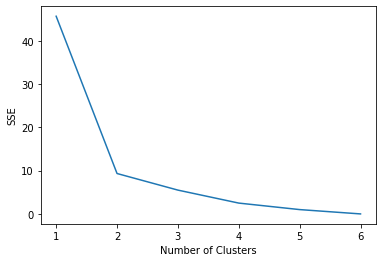

In [46]:
plt.plot(num_clusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')